# Classification in Materials Informatics
This notebook introduces classification concepts in the context of materials informatics.
We will:
1. Generate a dummy dataset representing materials properties.
2. Use scikit-learn to build a classification model.
3. Evaluate the model's performance.
4. Predict the classification of a new material based on its properties.

Google Colab link https://colab.research.google.com/drive/1EJNJ7H2XotA7dm6CpQlJ38Cjqexsrn8Q?usp=sharing


In [49]:
#First things first, lets get our libraries.
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Generate a dummy dataset
Simulate a dataset with 3 classes representing different material types (e.g., metals, ceramics, polymers) and 5 features representing material properties (e.g., density, thermal conductivity, melting point, hardness, electrical resistivity)

We could use make_classification function from scikit-learn, but then it might populate materials properties that are crazy. Let's make our own function instead.


In [50]:
def generate_materials_data(n_samples):
    np.random.seed(42)  # For reproducibility
    density = np.random.uniform(0.5, 20, n_samples)  # g/cm^3
    thermal_conductivity = np.random.uniform(0.1, 400, n_samples)  # W/(m·K)
    melting_point = np.random.uniform(200, 3500, n_samples)  # °C
    hardness = np.random.uniform(1, 10, n_samples)  # Mohs scale
    electrical_resistivity = np.random.uniform(1e-8, 1e-2, n_samples)  # Ohm·m

    labels = []
    for i in range(n_samples):
        if density[i] > 8 and thermal_conductivity[i] > 100 and melting_point[i] > 1200:
            labels.append(0)  # Metal
        elif 4 < density[i] <= 8 and hardness[i] > 6 and melting_point[i] > 1500:
            labels.append(1)  # Ceramic
        elif density[i] <= 4 and thermal_conductivity[i] < 10 and hardness[i] < 5:
            labels.append(2)  # Polymer
        else:
            # Assign default based on closest match, favoring ceramics for intermediate values
            if density[i] > 4:
                labels.append(1)  # Ceramic
            else:
                labels.append(2)  # Polymer

    return np.column_stack((density, thermal_conductivity, melting_point, hardness, electrical_resistivity)), np.array(labels)

#now lets use this custom function to create 500 materials
X, y = generate_materials_data(500)


Convert to a pandas DataFrame for easier manipulation


In [51]:

columns = ["Density", "Thermal_Conductivity", "Melting_Point", "Hardness", "Electrical_Resistivity"]
data = pd.DataFrame(X, columns=columns)
data['Material_Type'] = y


Map class labels to material types for clarity



In [52]:
data['Material_Type'] = data['Material_Type'].map({0: 'Metal', 1: 'Ceramic', 2: 'Polymer'})

# Display the first few rows of the dataset
data.head(10)


,Density,Thermal_Conductivity,Melting_Point,Hardness,Electrical_Resistivity,Material_Type
0,7.803532,279.294869,810.938665,5.671736,0.002617,Ceramic
1,19.038929,214.484937,1988.273126,5.312637,0.002470,Metal
2,14.773882,123.880094,3080.721258,1.230779,0.009063,Metal
3,12.173840,325.536628,2616.342125,4.071230,0.002495,Metal
4,3.542363,273.923996,2861.651788,4.421761,0.002720,Polymer
5,3.541893,65.130514,2373.985110,4.589405,0.007594,Polymer
6,1.632630,364.379781,2484.512663,6.221551,0.004497,Polymer
7,17.390435,329.032643,3002.345650,5.802423,0.007767,Metal
8,12.221743,379.924985,1023.904429,6.471146,0.000654,Ceramic
9,14.307415,290.315231,1815.102380,7.883949,0.004876,Metal


# Step 2: Split the dataset into training and testing sets


In [53]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



# Step 3: Train a classification model
We'll use a Random Forest classifier, but many other options are available

In [54]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 4: Evaluate the model


In [55]:
# Make predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Metal', 'Ceramic', 'Polymer']))


Classification Report:
              precision    recall  f1-score   support

       Metal       1.00      0.96      0.98        48
     Ceramic       0.97      1.00      0.99        68
     Polymer       1.00      1.00      1.00        34

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



# Confusion matrix
Classificaiton model outputs are often shown in a confusion matrix

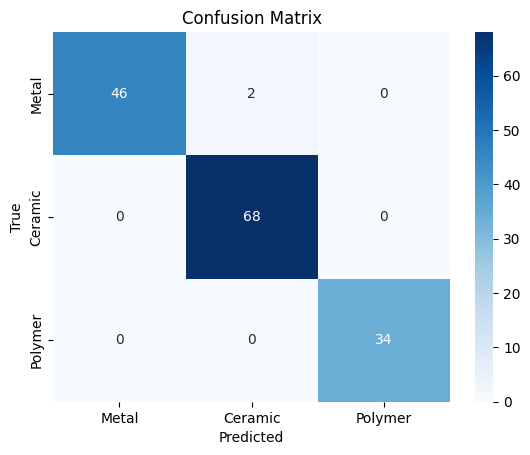

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Metal', 'Ceramic', 'Polymer'],
            yticklabels=['Metal', 'Ceramic', 'Polymer'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Feature importance
Random forests are awesome models because they can easily generate feature importance so that we know which features contributed a lot or a little to the models ability to classify

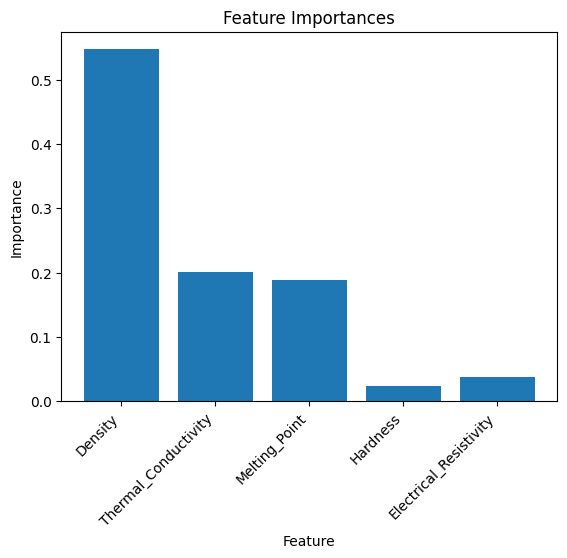

In [57]:
feature_importances = clf.feature_importances_
plt.bar(columns, feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment to prevent overlap
plt.show()


# Step 5: Predict the classification for a new material
Let's start by defining the properties of a new material. Then, we will use these properties to predict whether this new material is a polymer, metal, or a ceramic.

In [58]:

new_material = np.array([[7.85, 50, 1510, 6.5, 1.7e-7]]) #density, therm cond., melting pt, hardness, electrical res.

# Predict the material type
predicted_class = clf.predict(new_material)
class_map = {0: 'Metal', 1: 'Ceramic', 2: 'Polymer'}
print(f"The predicted material type is: {class_map[predicted_class[0]]}")


The predicted material type is: Ceramic



# Discussion

How does this all connect this to materials informatics?

Classification is still an active task in materials research. For example, if you have a composition, could you predict which crystal structure it should take?

Example: We tackled that very problem in this review paper in Chemistry of Materials
https://dx.doi.org/10.1021/acs.chemmater.7b05304 In that paper we demonstrated that you can predict structures pretty well and even showed at what point insufficient data will limit your ability.